In [177]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
%matplotlib inline


In [178]:
data=pd.read_excel('default of credit card clients.xls')

In [123]:

data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

In [4]:
data.shape

(30000, 24)

In [5]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [124]:
# Displaying basic statistics of the features
x.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [7]:
 data.shape

(30000, 24)

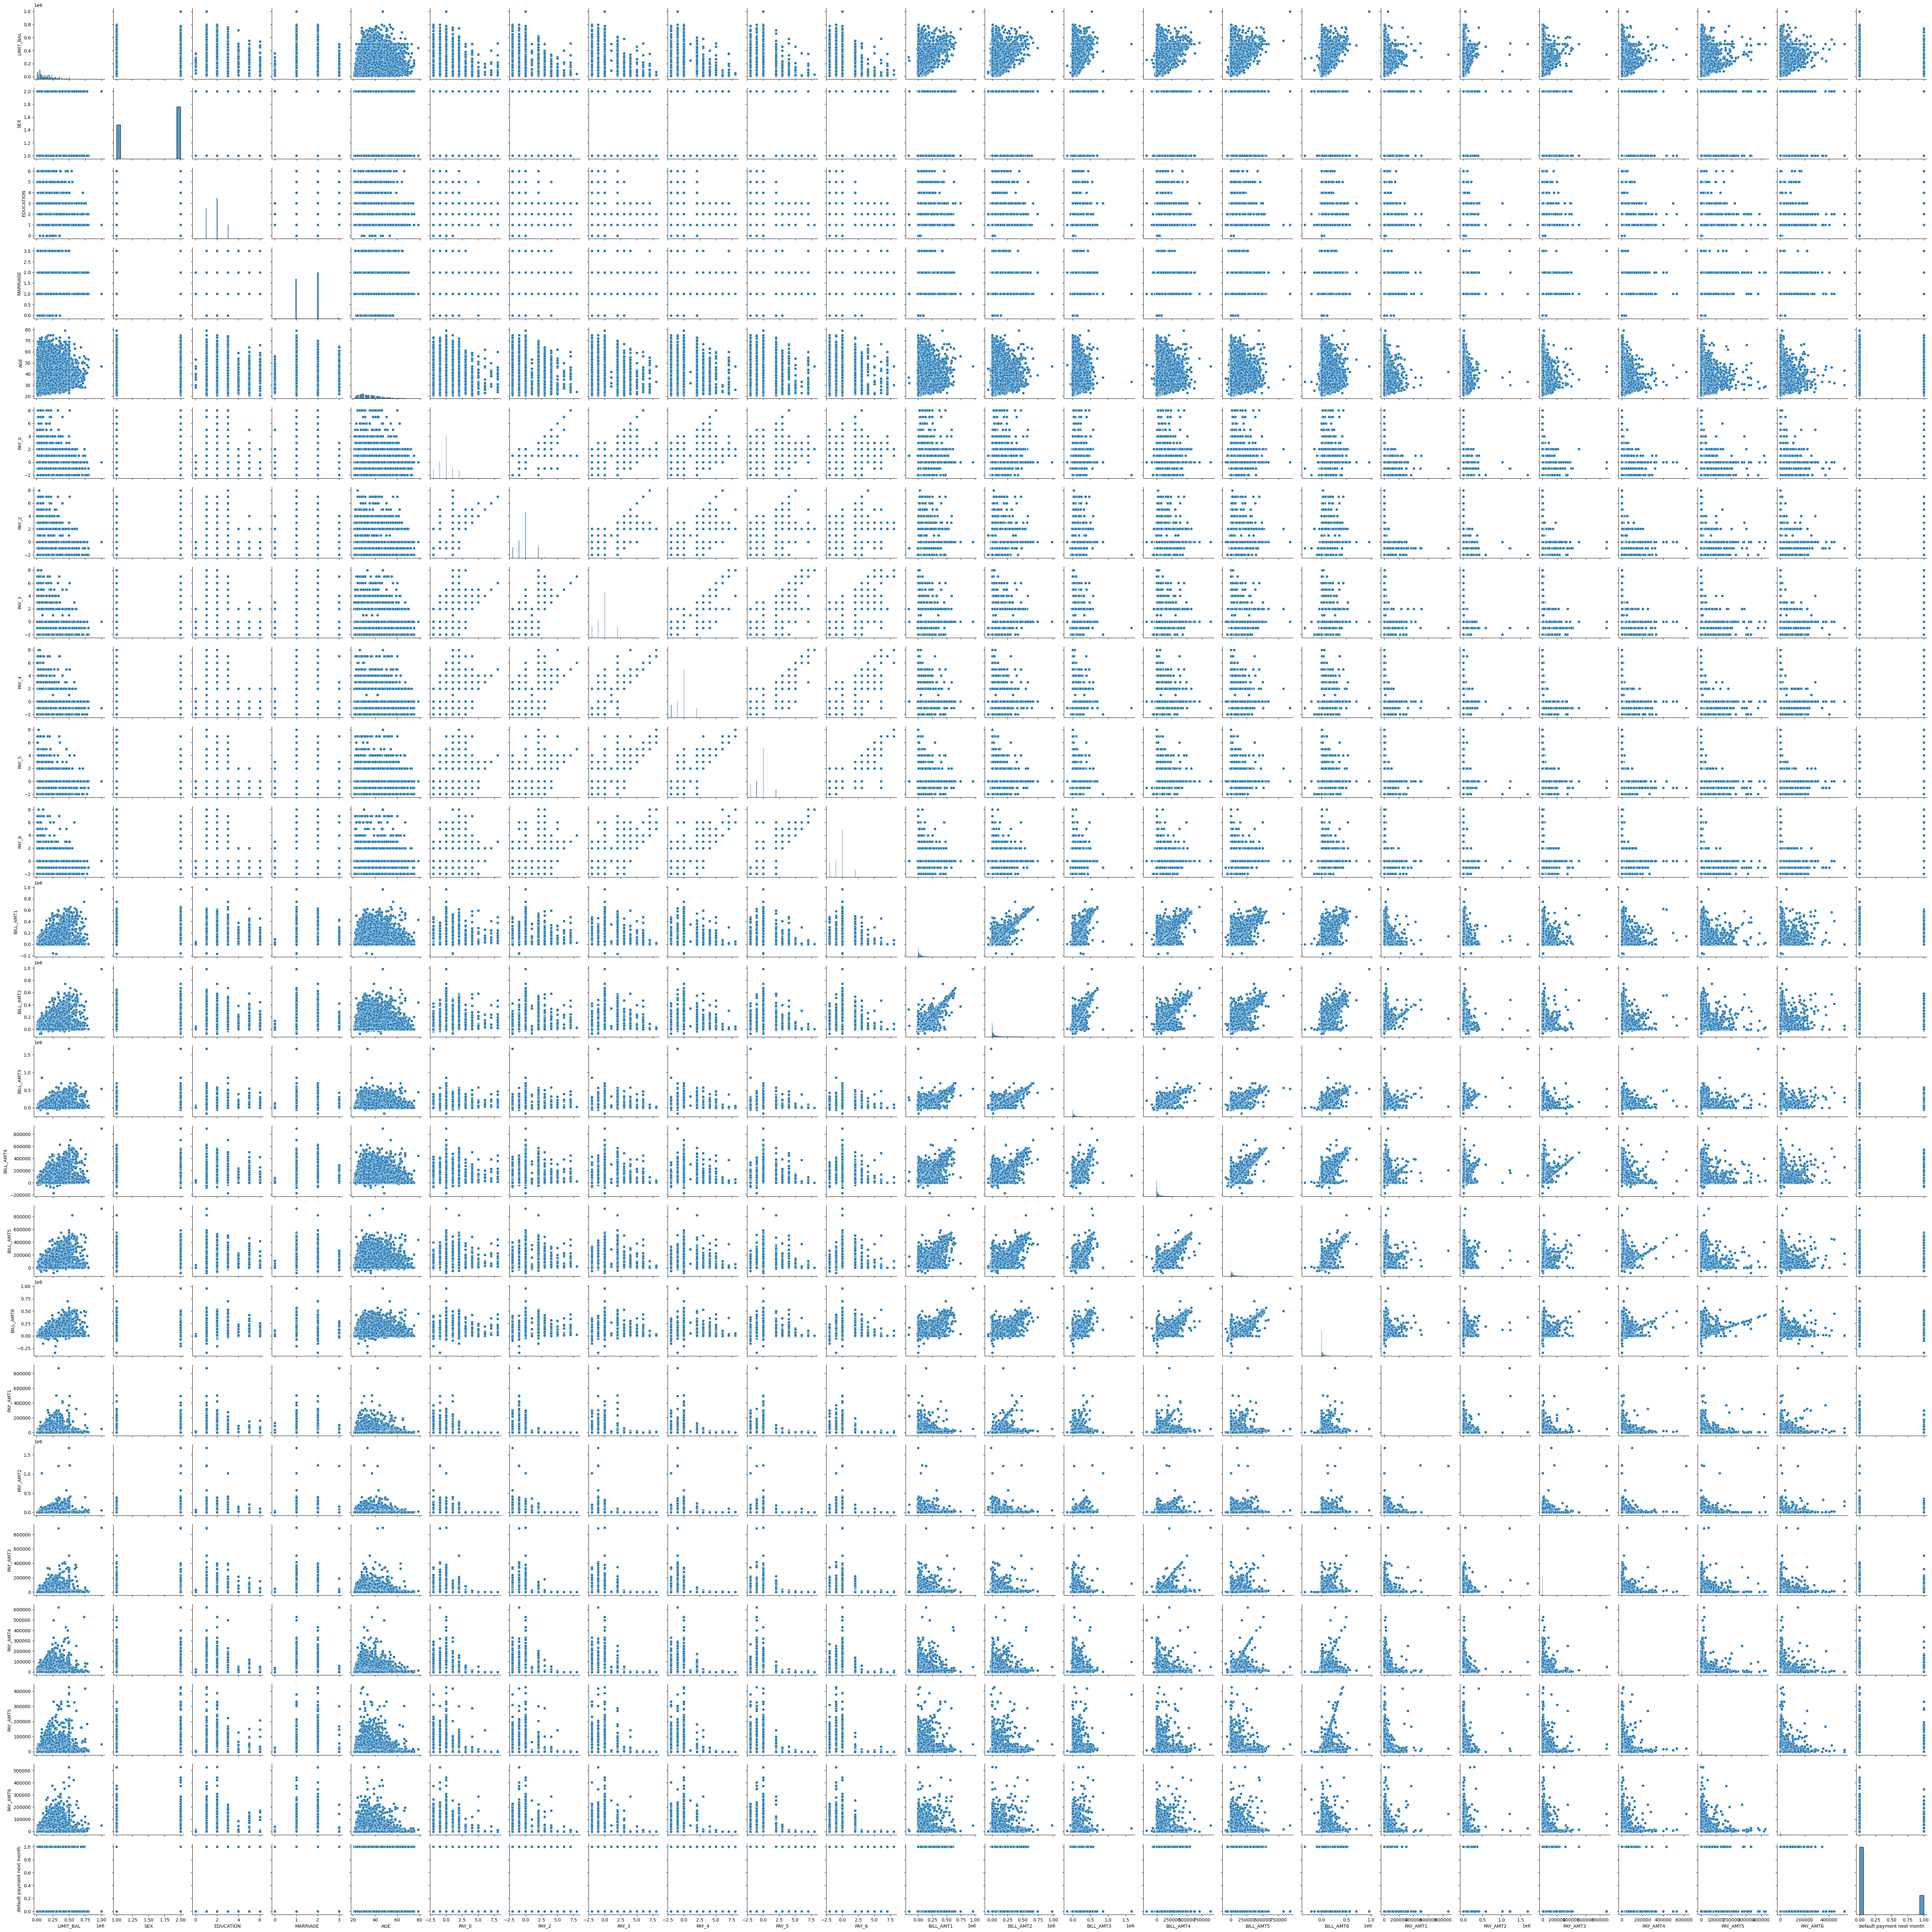

In [9]:
# # Create the pairplot
sns.pairplot(data)

From the pair-plot above, we can see that there is some relationship between the feature columns.
To confirm that we’d plot a correlation heatmap.


<Axes: >

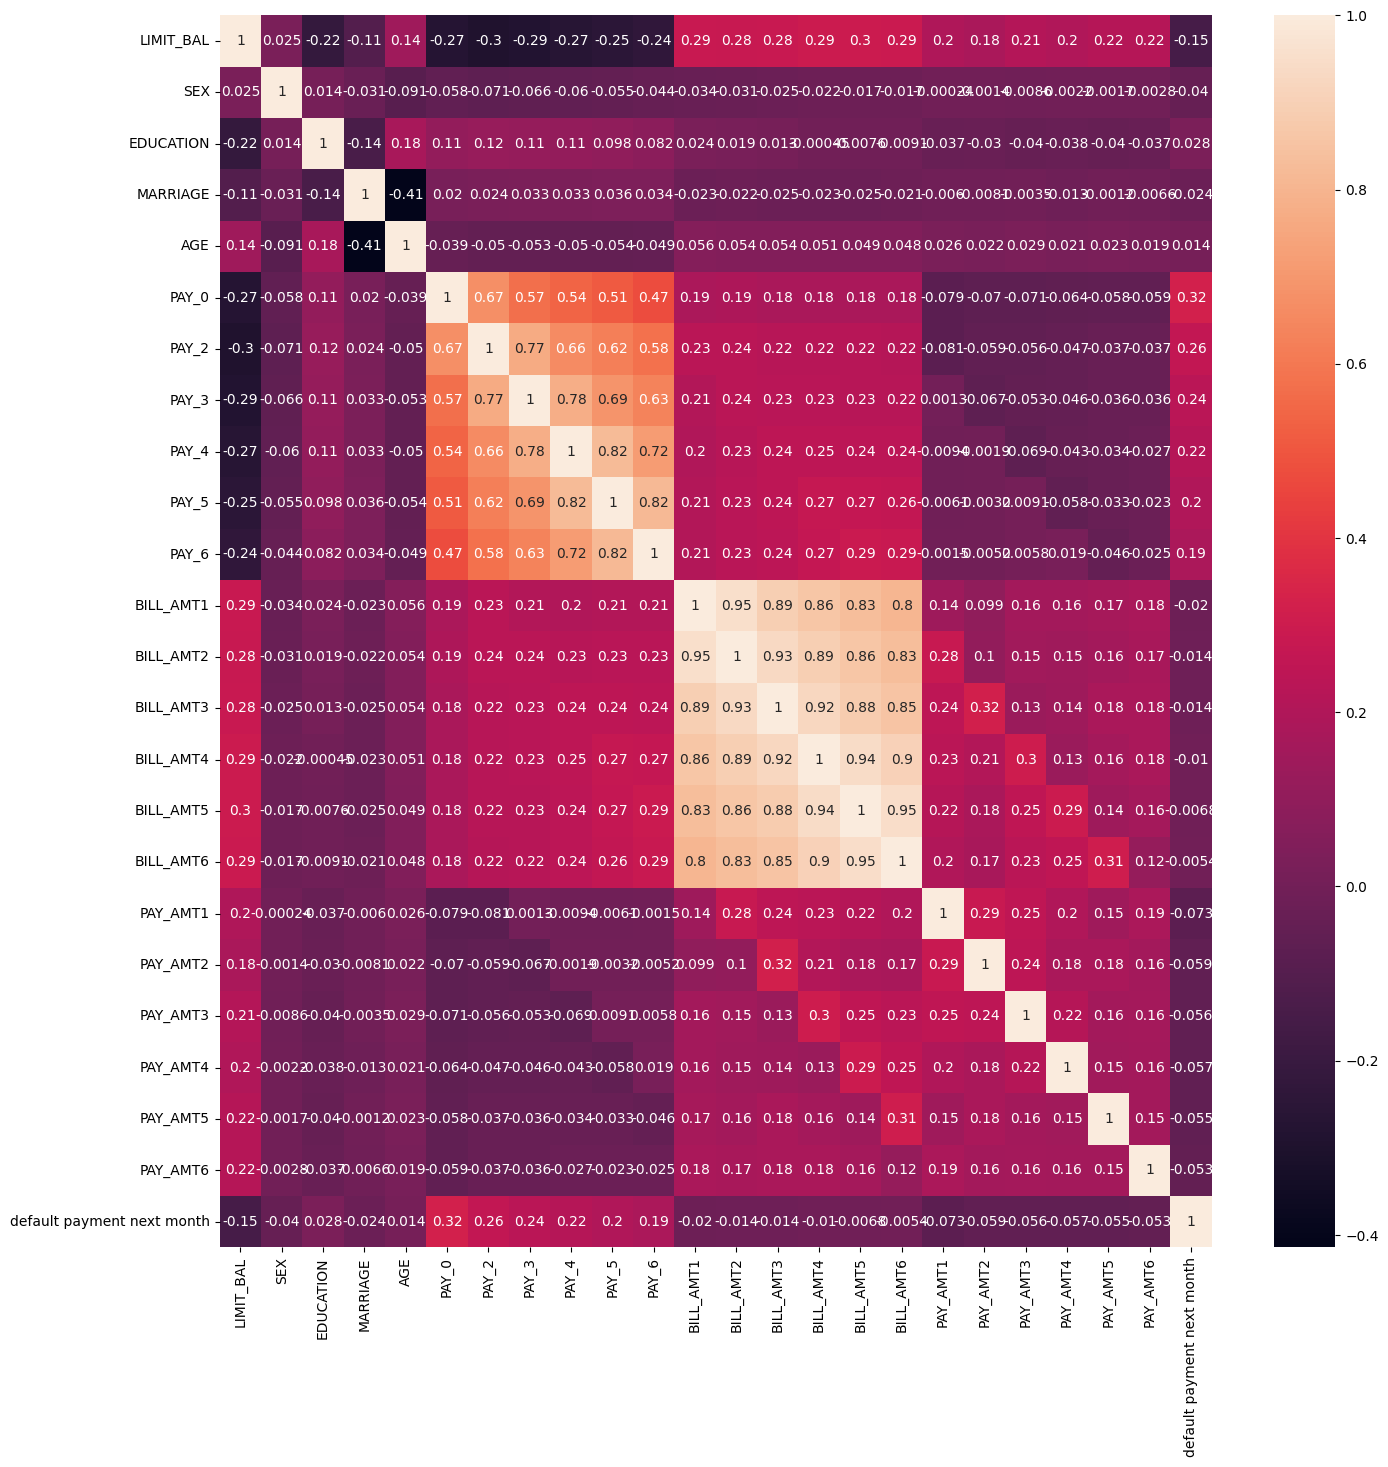

In [10]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True )

In [126]:
x=data

In [127]:
# basic preprocessing

In [128]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [129]:
# 'SEX', 'EDUCATION', and 'MARRIAGE' are categorical features
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_features = list(set(x.columns) - set(categorical_features))


In [130]:
# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [131]:
x.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

In [132]:
# Apply preprocessing to features
X_preprocessed = preprocessor.fit_transform(x)


In [133]:

from sklearn.cluster import KMeans

In [134]:
# Assuming X_preprocessed is your preprocessed data
wcss = []

# Determine the optimal number of clusters (k)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_preprocessed)
    wcss.append(kmeans.inertia_)

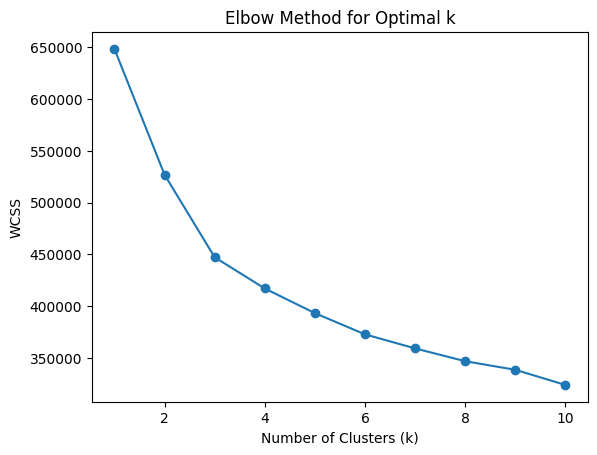

In [90]:
# Plot the WCSS values
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

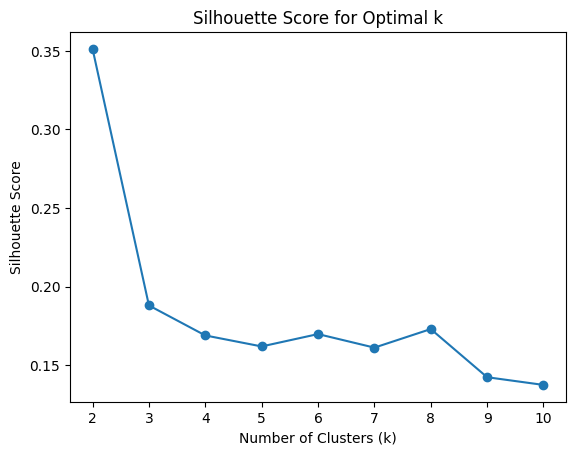

In [135]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_preprocessed)
    silhouette_scores.append(silhouette_score(X_preprocessed, kmeans.labels_))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [136]:
from sklearn.cluster import KMeans

#  X_preprocessed is your preprocessed data
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)

# Add the cluster labels to the original data
x_clustered = pd.concat([x, pd.DataFrame({'Cluster': clusters})], axis=1)



In [137]:
# Display the first few rows of the clustered data
x_clustered.head(10)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   
5      50000    1          1         2   37      0      0      0      0   
6     500000    1          1         2   29      0      0      0      0   
7     100000    2          2         2   23      0     -1     -1      0   
8     140000    2          3         1   28      0      0      2      0   
9      20000    1          3         2   35     -2     -2     -2     -2   

   PAY_5  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0     -2  ...          0          0         0       689         0         0   
1      0  ...       3455       3261         0      1000      1000      1000   
2      0  ...      14948      15549      1518      1500      1000      1000   
3      0  ...      28959      29547      2000      2019      1200      1100   
4      0  ...      19146      19131      2000     36681     10000      9000   
5      0  ...      19619      20024      2500      1815       657      1000   
6      0  ...     483003     473944     55000     40000     38000     20239   
7      0  ...       -159        567       380       601         0       581   
8      0  ...      11793       3719      3329         0       432      1000   
9     -1  ...      13007      13912         0         0         0     13007   

   PAY_AMT5  PAY_AMT6  default payment next month  Cluster  
0         0         0                           1        2  
1         0      2000                           1        2  
2      1000      5000                           0        2  
3      1069      1000                           0        2  
4       689       679                           0        2  
5      1000       800                           0        2  
6     13750     13770                           0        1  
7      1687      1542                           0        0  
8      1000      1000                           0        2  
9      1122         0                           0        0  

[10 rows x 25 columns]

In [138]:
# Assuming x_clustered is your original data with cluster labels
# Create separate dataframes for each cluster
cluster_dataframes = [x_clustered[x_clustered['Cluster'] == cluster_label].drop('Cluster', axis=1) for cluster_label in range(k)]

# Display the first few rows of each cluster dataframe
for i, cluster_df in enumerate(cluster_dataframes):
    print(f"\nCluster {i} DataFrame:")
    print(cluster_df.head())



Cluster 0 DataFrame:
    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
7      100000    2          2         2   23      0     -1     -1      0   
9       20000    1          3         2   35     -2     -2     -2     -2   
11     260000    2          1         2   51     -1     -1     -1     -1   
12     630000    2          2         2   41     -1      0     -1     -1   
18     360000    2          1         1   49      1     -2     -2     -2   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
7       0  ...        221       -159        567       380       601         0   
9      -1  ...          0      13007      13912         0         0         0   
11     -1  ...       8517      22287      13668     21818      9966      8583   
12     -1  ...       6500       6500       2870      1000      6500      6500   
18     -2  ...          0          0          0         0         0         0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  

In [139]:
# Assuming x_clustered is your original data with cluster labels
# Create a dictionary to store dataframes for each cluster
cluster_dataframes = {}
for cluster_label in range(k):
    cluster_name = f'Cluster {cluster_label}'
    cluster_dataframes[cluster_name] = x_clustered[x_clustered['Cluster'] == cluster_label].drop('Cluster', axis=1)

# Display the first few rows of each cluster dataframe
for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\n{cluster_name} DataFrame:")
    print(cluster_df.head())



Cluster 0 DataFrame:
    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
7      100000    2          2         2   23      0     -1     -1      0   
9       20000    1          3         2   35     -2     -2     -2     -2   
11     260000    2          1         2   51     -1     -1     -1     -1   
12     630000    2          2         2   41     -1      0     -1     -1   
18     360000    2          1         1   49      1     -2     -2     -2   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
7       0  ...        221       -159        567       380       601         0   
9      -1  ...          0      13007      13912         0         0         0   
11     -1  ...       8517      22287      13668     21818      9966      8583   
12     -1  ...       6500       6500       2870      1000      6500      6500   
18     -2  ...          0          0          0         0         0         0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  

In [140]:
cluster_0_dataframe = cluster_dataframes['Cluster 0']

In [141]:
cluster_0_dataframe.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
7      100000    2          2         2   23      0     -1     -1      0   
9       20000    1          3         2   35     -2     -2     -2     -2   
11     260000    2          1         2   51     -1     -1     -1     -1   
12     630000    2          2         2   41     -1      0     -1     -1   
18     360000    2          1         1   49      1     -2     -2     -2   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
7       0  ...        221       -159        567       380       601         0   
9      -1  ...          0      13007      13912         0         0         0   
11     -1  ...       8517      22287      13668     21818      9966      8583   
12     -1  ...       6500       6500       2870      1000      6500      6500   
18     -2  ...          0          0          0         0         0         0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
7        581      1687      1542                           0  
9      13007      1122         0                           0  
11     22301         0      3640                           0  
12      6500      2870         0                           0  
18         0         0         0                           0  

[5 rows x 24 columns]

In [142]:
# Assuming cluster_dataframes is your dictionary
cluster_1_dataframe = cluster_dataframes['Cluster 1']

# Display the first few rows of the dataframe for Cluster 1
cluster_1_dataframe.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
6      500000    1          1         2   29      0      0      0      0   
17     320000    1          1         1   49      0      0      0     -1   
36     280000    1          2         1   40      0      0      0      0   
40     360000    1          1         2   33      0      0      0      0   
57     180000    2          2         1   34      0      0      0      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
6       0  ...     542653     483003     473944     55000     40000     38000   
17     -1  ...      70074       5856     195599     10358     10000     75940   
36      0  ...     170410     173901     177413      8026      8060      6300   
40      0  ...     628699     195969     179224     10000      7000      6000   
57      0  ...     168608     132202     129918      8083      7296      5253   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
6      20239     13750     13770                           0  
17     20000    195599     50000                           0  
36      6400      6400      6737                           0  
40    188840     28000      4000                           0  
57      4814      4816      3800                           0  

[5 rows x 24 columns]

In [143]:
# Assuming cluster_dataframes is your dictionary
cluster_2_dataframe = cluster_dataframes['Cluster 2']

# Display the first few rows of the dataframe for Cluster 1
cluster_2_dataframe.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

In [144]:
cluster_2_dataframe.shape

(15862, 24)

In [145]:
cluster_0_dataframe.shape

(10538, 24)

In [146]:
cluster_1_dataframe.shape

(3600, 24)

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming cluster_dataframes is a list of dataframes for each cluster
cluster_accuracies = {}

for i, cluster_df in enumerate(cluster_dataframes):
    # # Display the shape of the cluster_df
    # print(f"Cluster {i} DataFrame Shape: {cluster_df.shape}")

    # Assuming 'default payment next month' is your target variable
    X_cluster = cluster_df.drop('default payment next month', axis=1)
    y_cluster = cluster_df['default payment next month']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Create a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), X_cluster.select_dtypes(include=['int64', 'float64']).columns),
            ('cat', OneHotEncoder(), X_cluster.select_dtypes(include=['object']).columns)
        ])

    # Create a pipeline with Naive Bayes
    pipeline = make_pipeline(preprocessor, GaussianNB())

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = pipeline.predict(X_test)

    # Calculate accuracy and store it in the dictionary
    accuracy = accuracy_score(y_test, predictions)
    cluster_accuracies[f'Cluster {i}'] = accuracy

# Display accuracies for each cluster
for cluster_name, accuracy in cluster_accuracies.items():
    print(f"{cluster_name} Accuracy: {accuracy}")


Cluster 0 Accuracy: 0.4283681214421252
Cluster 1 Accuracy: 0.8138888888888889
Cluster 2 Accuracy: 0.7557516545855657


In [155]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming cluster_dataframes is a list of dataframes for each cluster
cluster_accuracies = {}
best_params_per_cluster = {}

for i, cluster_df in enumerate(cluster_dataframes):
    # # Display the shape of the cluster_df
    # print(f"Cluster {i} DataFrame Shape: {cluster_df.shape}")

    # Assuming 'default payment next month' is your target variable
    X_cluster = cluster_df.drop('default payment next month', axis=1)
    y_cluster = cluster_df['default payment next month']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Create a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), X_cluster.select_dtypes(include=['int64', 'float64']).columns),
            ('cat', OneHotEncoder(), X_cluster.select_dtypes(include=['object']).columns)
        ])

    # Create a pipeline with Naive Bayes
    pipeline = make_pipeline(preprocessor, GaussianNB())

    # Define hyperparameter grid for Gaussian Naive Bayes (add more as needed)
    param_grid = {
        'gaussiannb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
    }

    # Create GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the grid search on the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    best_params_per_cluster[f'Cluster {i}'] = best_params
    print(f"Best Hyperparameters for Cluster {i}: {best_params}")

    # Get the best estimator
    best_estimator = grid_search.best_estimator_

    # Make predictions on the test data using the best estimator
    predictions = best_estimator.predict(X_test)

    # Calculate accuracy and store it in the dictionary
    accuracy = accuracy_score(y_test, predictions)
    cluster_accuracies[f'Cluster {i}'] = accuracy
    print(f"Cluster {i} Accuracy: {accuracy}")

# Display the best hyperparameters for each cluster
print("\nBest Hyperparameters for Each Cluster:")
for cluster_name, params in best_params_per_cluster.items():
    print(f"{cluster_name}: {params}")


Best Hyperparameters for Cluster 0: {'gaussiannb__var_smoothing': 1e-09}
Cluster 0 Accuracy: 0.4283681214421252
Best Hyperparameters for Cluster 1: {'gaussiannb__var_smoothing': 1e-09}
Cluster 1 Accuracy: 0.8138888888888889
Best Hyperparameters for Cluster 2: {'gaussiannb__var_smoothing': 1e-09}
Cluster 2 Accuracy: 0.7557516545855657

Best Hyperparameters for Each Cluster:
Cluster 0: {'gaussiannb__var_smoothing': 1e-09}
Cluster 1: {'gaussiannb__var_smoothing': 1e-09}
Cluster 2: {'gaussiannb__var_smoothing': 1e-09}


In [156]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming cluster_dataframes is a list of dataframes for each cluster
cluster_accuracies = {}
best_params_per_cluster = {}

for i, cluster_df in enumerate(cluster_dataframes):
    # Display the shape of the cluster_df
    print(f"Cluster {i} DataFrame Shape: {cluster_df.shape}")

    # Assuming 'default payment next month' is your target variable
    X_cluster = cluster_df.drop('default payment next month', axis=1)
    y_cluster = cluster_df['default payment next month']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Create a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), X_cluster.select_dtypes(include=['int64', 'float64']).columns),
            ('cat', OneHotEncoder(), X_cluster.select_dtypes(include=['object']).columns)
        ])

    # Create a pipeline with Random Forest
    pipeline = make_pipeline(preprocessor, RandomForestClassifier())

    # Define hyperparameter grid for Random Forest (add more as needed)
    param_grid = {
        'randomforestclassifier__n_estimators': [50, 100, 150],
        'randomforestclassifier__max_depth': [None, 10, 20, 30],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4]
    }

    # Create GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the grid search on the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    best_params_per_cluster[f'Cluster {i}'] = best_params
    print(f"Best Hyperparameters for Cluster {i}: {best_params}")

    # Get the best estimator
    best_estimator = grid_search.best_estimator_

    # Make predictions on the test data using the best estimator
    predictions = best_estimator.predict(X_test)

    # Calculate accuracy and store it in the dictionary
    accuracy = accuracy_score(y_test, predictions)
    cluster_accuracies[f'Cluster {i}'] = accuracy
    print(f"Cluster {i} Accuracy: {accuracy}")

# Display the best hyperparameters for each cluster
print("\nBest Hyperparameters for Each Cluster:")
for cluster_name, params in best_params_per_cluster.items():
    print(f"{cluster_name}: {params}")


Cluster 0 DataFrame Shape: (10538, 24)
Best Hyperparameters for Cluster 0: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}
Cluster 0 Accuracy: 0.8444022770398482
Cluster 1 DataFrame Shape: (3600, 24)
Best Hyperparameters for Cluster 1: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 150}
Cluster 1 Accuracy: 0.8472222222222222
Cluster 2 DataFrame Shape: (15862, 24)
Best Hyperparameters for Cluster 2: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 150}
Cluster 2 Accuracy: 0.7875827292782855

Best Hyperparameters for Each Cluster:
Cluster 0: {'randomforestclassifier__max_depth': 10, 'randomforestclassif

In [157]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming cluster_dataframes is a list of dataframes for each cluster
cluster_accuracies = {}
best_params_per_cluster = {}

for i, cluster_df in enumerate(cluster_dataframes):
    # Display the shape of the cluster_df
    print(f"Cluster {i} DataFrame Shape: {cluster_df.shape}")

    # Assuming 'default payment next month' is your target variable
    X_cluster = cluster_df.drop('default payment next month', axis=1)
    y_cluster = cluster_df['default payment next month']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Create a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), X_cluster.select_dtypes(include=['int64', 'float64']).columns),
            ('cat', OneHotEncoder(), X_cluster.select_dtypes(include=['object']).columns)
        ])

    # Create a pipeline with XGBoost
    pipeline = make_pipeline(preprocessor, XGBClassifier(objective='binary:logistic'))

    # Define hyperparameter grid for XGBoost (add more as needed)
    param_grid = {
        'xgbclassifier__n_estimators': [50, 100, 130],
        'xgbclassifier__max_depth': range(3, 11, 1),
        'xgbclassifier__learning_rate': [0.1, 0.01, 0.001],
        'xgbclassifier__random_state': [0, 50, 100]
    }

    # Create GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the grid search on the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    best_params_per_cluster[f'Cluster {i}'] = best_params
    print(f"Best Hyperparameters for Cluster {i}: {best_params}")

    # Get the best estimator
    best_estimator = grid_search.best_estimator_

    # Make predictions on the test data using the best estimator
    predictions = best_estimator.predict(X_test)

    # Calculate accuracy and store it in the dictionary
    accuracy = accuracy_score(y_test, predictions)
    cluster_accuracies[f'Cluster {i}'] = accuracy
    print(f"Cluster {i} Accuracy: {accuracy}")

# Display the best hyperparameters for each cluster
print("\nBest Hyperparameters for Each Cluster:")
for cluster_name, params in best_params_per_cluster.items():
    print(f"{cluster_name}: {params}")


Cluster 0 DataFrame Shape: (10538, 24)
Best Hyperparameters for Cluster 0: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__random_state': 0}
Cluster 0 Accuracy: 0.8439278937381404
Cluster 1 DataFrame Shape: (3600, 24)
Best Hyperparameters for Cluster 1: {'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__random_state': 0}
Cluster 1 Accuracy: 0.8458333333333333
Cluster 2 DataFrame Shape: (15862, 24)
Best Hyperparameters for Cluster 2: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__random_state': 0}
Cluster 2 Accuracy: 0.7907343208320202

Best Hyperparameters for Each Cluster:
Cluster 0: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__random_state': 0}
Cluster 1: {'xgbclassifier__learning_rate': 0.01, 'x

In [182]:
x=data.drop(labels=['default payment next month'],axis=1)
y=data['default payment next month']

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming x is your entire dataset and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), x.select_dtypes(include=['object']).columns)
    ])

# Set hyperparameters
hyperparameters = {
    'max_depth': None,
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'n_estimators': 100
}

# Create a pipeline with Random Forest and specified hyperparameters
pipeline = make_pipeline(preprocessor, RandomForestClassifier(**hyperparameters))

# Fit the model on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Best Hyperparameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 100}
Accuracy: 0.8208333333333333


In [174]:
# last model training

In [183]:
x

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0         -2  ...        689          0          0          0         0   
1          0  ...       2682       3272       3455       3261         0   
2          0  ...      13559      14331      14948      15549      1518   
3          0  ...      49291      28314      28959      29547      2000   
4          0  ...      35835      20940      19146      19131      2000   
...      ...  ...        ...        ...        ...        ...       ...   
29995      0  ...     208365      88004      31237      15980      8500   
29996      0  ...       3502       8979       5190          0      1837   
29997      0  ...       2758      20878      20582      19357         0   
29998      0  ...      76304      52774      11855      48944     85900   
29999      0  ...      49764      36535      32428      15313      2078   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0           689         0         0         0         0  
1          1000      1000      1000         0      2000  
2          1500      1000      1000      1000      5000  
3          2019      1200      1100      1069      1000  
4         36681     10000      9000       689       679  
...         ...       ...       ...       ...       ...  
29995     20000      5003      3047      5000      1000  
29996      3526      8998       129         0         0  
29997         0     22000      4200      2000      3100  
29998      3409      1178      1926     52964      1804  
29999      1800      1430      1000      1000      1000  

[30000 rows x 23 columns]

In [184]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Assuming x is your entire dataset and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), x.select_dtypes(include=['object']).columns)
    ])

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Create a RandomForestClassifier with the specified hyperparameters
rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=100,
    random_state=42  # You can set the random_state for reproducibility
)

# Train the model on the training set
rf_model.fit(X_train_preprocessed, y_train)

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.joblib')

# Transform the test data using the preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Make predictions on the test data
predictions = rf_model.predict(X_test_preprocessed)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8181666666666667


In [206]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Assuming x is your entire dataset and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X_train.select_dtypes(include=['object']).columns)
    ])

# Create a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        max_depth=None,
        min_samples_leaf=2,
        min_samples_split=10,
        n_estimators=100,
        random_state=42
    ))
])

# Fit the pipeline on the training set
pipeline.fit(X_train, y_train)

# Save the trained pipeline
model_path = 'random_forest_model.joblib'
joblib.dump(pipeline, model_path)

# Make predictions on the test data
predictions = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8181666666666667


In [193]:
# Load the trained RandomForest model
rf_model = joblib.load("random_forest_model.joblib")

In [195]:
data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 24 columns]

In [197]:
test_data = data.drop('default payment next month', axis=1)


In [198]:
test_data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0         -2  ...        689          0          0          0         0   
1          0  ...       2682       3272       3455       3261         0   
2          0  ...      13559      14331      14948      15549      1518   
3          0  ...      49291      28314      28959      29547      2000   
4          0  ...      35835      20940      19146      19131      2000   
...      ...  ...        ...        ...        ...        ...       ...   
29995      0  ...     208365      88004      31237      15980      8500   
29996      0  ...       3502       8979       5190          0      1837   
29997      0  ...       2758      20878      20582      19357         0   
29998      0  ...      76304      52774      11855      48944     85900   
29999      0  ...      49764      36535      32428      15313      2078   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0           689         0         0         0         0  
1          1000      1000      1000         0      2000  
2          1500      1000      1000      1000      5000  
3          2019      1200      1100      1069      1000  
4         36681     10000      9000       689       679  
...         ...       ...       ...       ...       ...  
29995     20000      5003      3047      5000      1000  
29996      3526      8998       129         0         0  
29997         0     22000      4200      2000      3100  
29998      3409      1178      1926     52964      1804  
29999      1800      1430      1000      1000      1000  

[30000 rows x 23 columns]

In [199]:
# Use the preprocessor to transform the test data
test_data_preprocessed = preprocessor.transform(test_data)


In [200]:
test_data_preprocessed

array([[-1.13485002,  0.80815856,  0.18430622, ..., -0.29935805,
        -0.30852284, -0.29553162],
       [-0.3640317 ,  0.80815856,  0.18430622, ..., -0.23802483,
        -0.30852284, -0.18097254],
       [-0.59527719,  0.80815856,  0.18430622, ..., -0.23802483,
        -0.24449867, -0.00913392],
       ...,
       [-1.05776818, -1.23738094,  0.18430622, ..., -0.04175854,
        -0.18047449, -0.11796504],
       [-0.67235902, -1.23738094,  1.44667759, ..., -0.18123028,
         3.08245347, -0.19219933],
       [-0.90360452, -1.23738094,  0.18430622, ..., -0.23802483,
        -0.24449867, -0.23825208]])

In [201]:
# Make predictions on the test data
predictions = rf_model.predict(test_data_preprocessed)

In [202]:
# Create a DataFrame with the original features and the predicted target variable
result_df = pd.DataFrame(test_data, columns=test_data.columns)
result_df['predicted_target'] = predictions

# Save the result DataFrame to a CSV file
result_df.to_csv('test_predictions.csv', index=False)

In [204]:
# Get the true labels for the test data
true_labels = data['default payment next month']

In [205]:
accuracy = accuracy_score(true_labels, predictions)
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.8882666666666666


In [212]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Assuming x is your entire dataset and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X_train.select_dtypes(include=['object']).columns)
    ])

# Create a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        max_depth=None,
        min_samples_leaf=2,
        min_samples_split=10,
        n_estimators=100,
        random_state=42
    ))
])

# Fit the pipeline on the training set
pipeline.fit(X_train, y_train)

# Save the trained pipeline
model_path = 'random_forest_model.joblib'
joblib.dump(pipeline, model_path)

# Make predictions on the test data
predictions = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8181666666666667


In [214]:
from sklearn.pipeline import Pipeline
import pandas as pd
import joblib

def load_and_predict(input_data, model_path='random_forest_model.joblib'):
    # Load the trained pipeline
    pipeline = joblib.load(model_path)

    # Make predictions using the loaded pipeline
    predictions = pipeline.predict(x_test)

    return predictions

# Example usage:
# Assuming 'input_data' is the data you want to make predictions on
# Adjust 'input_data' according to your actual input format
predictions = load_and_predict(x_test)
print(predictions)


[0 0 0 ... 0 0 0]
